In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Central Limit Theorem

In [2]:
coin = Table().with_column(
    'Face', ['Heads', 'Tails'],
    'Chance', [0.6, 0.4])
coin


Face,Chance
Heads,0.6
Tails,0.4


In [4]:
sample = coin.sample_from_distribution('Chance', 1000)
sample

Face,Chance,Chance sample
Heads,0.6,583
Tails,0.4,417


In [5]:
sample.column(2).item(0)

583

In [6]:
heads = []
for i in np.arange(10000):
    sample = coin.sample_from_distribution('Chance', 1000)
    heads.append(sample.column(2).item(0))

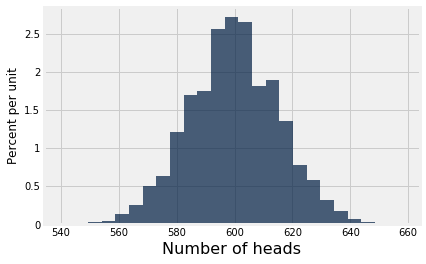

In [8]:
Table().with_column('Number of heads', heads).hist(bins=25)

In [10]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


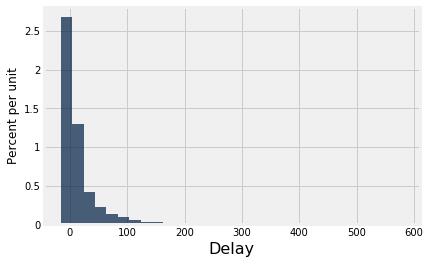

In [12]:
united.hist('Delay', bins=30)

In [17]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [19]:
delay = united.select('Delay')
delay.show(3)

Delay
257
28
-3


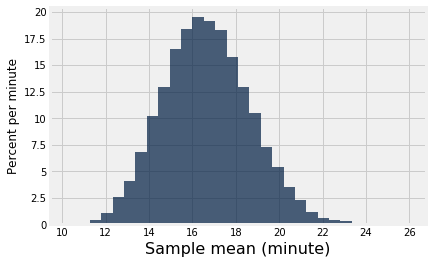

In [29]:
means = []
for i in np.arange(10000):
    sample = delay.sample(400)
    means.append(np.mean(sample.column(0)))

Table().with_column('Sample mean', means).hist(bins=30, unit='minute')

In [ ]:
means = []
for i in np.arange(10000):
    sample = delay.sample(400)
    means.append(np.mean(sample.column(0)))

Table().with_column('Sample mean', means).hist(bins=30, unit='minute')

## Variability of the sample mean

In [ ]:
def sample_means(sample_size):
    means = []
    for i in np.arange(10000):
        sample = delay.sample(sample_size)
        means.append(np.mean(sample.column(0)))
    return means
sample_means(400)

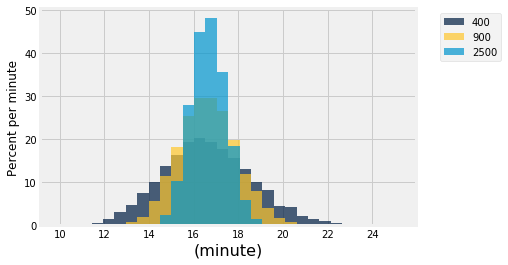

In [32]:
Table().with_column(
    '400', sample_means(400),
    '900', sample_means(900),
    '2500', sample_means(2500),
).hist(bins=30, unit='minute')

In [33]:
sd_delay

39.480199851609314

In [37]:
def variability(sample_size):
    means = sample_means(sample_size)
    Table().with_column('Sample mean', means).hist(bins=30, unit='minute')
    sqrt_n = np.sqrt(sample_size)
    
    print('Sample size:          ', sample_size)
    print('Square root n:        ', sqrt_n)
    print('Sample mean SD:       ', np.std(means))
    print(sd_delay, '/', sqrt_n, '=', sd_delay / sqrt_n)

Sample size:           400
Square root n:         20.0
Sample mean SD:        1.97849688449
39.4801998516 / 20.0 = 1.97400999258


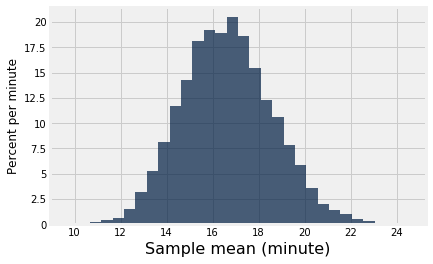

In [38]:
variability(400)

Sample size:           800
Square root n:         28.2842712475
Sample mean SD:        1.41842374267
39.4801998516 / 28.2842712475 = 1.39583585188


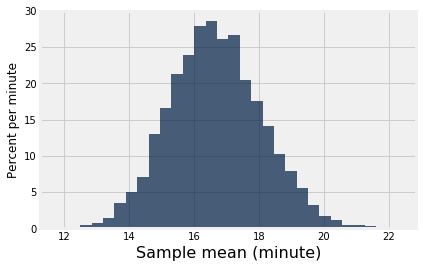

In [40]:
variability(800)

Sample size:           3200
Square root n:         56.5685424949
Sample mean SD:        0.693130084766
39.4801998516 / 56.5685424949 = 0.697917925942


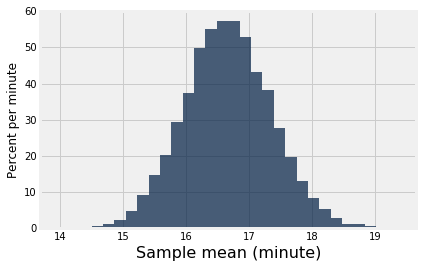

In [42]:
variability(3200)

Sample size:           1
Square root n:         1.0
Sample mean SD:        38.8841832297
39.4801998516 / 1.0 = 39.4801998516


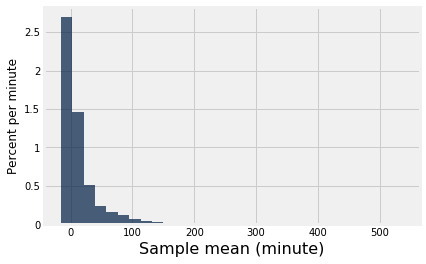

In [46]:
variability(1)

Sample size:           2
Square root n:         1.41421356237
Sample mean SD:        27.9201845033
39.4801998516 / 1.41421356237 = 27.9167170377


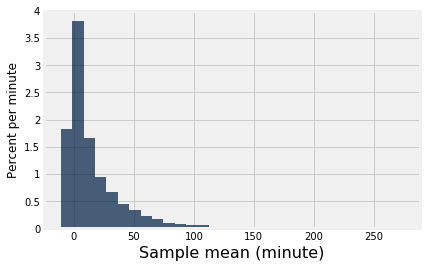

In [47]:
variability(2)

Sample size:           4
Square root n:         2.0
Sample mean SD:        19.6045309429
39.4801998516 / 2.0 = 19.7400999258


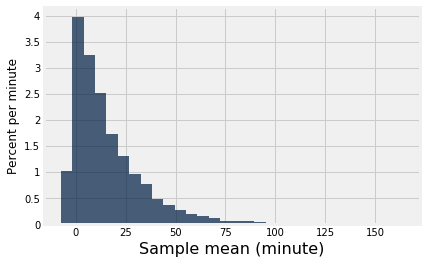

In [48]:
variability(4)

Sample size:           8
Square root n:         2.82842712475
Sample mean SD:        13.8185750017
39.4801998516 / 2.82842712475 = 13.9583585188


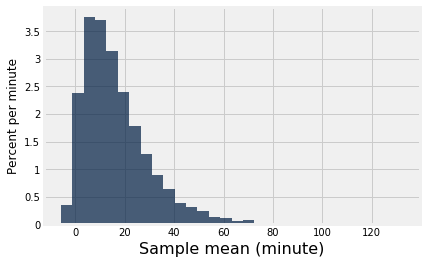

In [49]:
variability(8)

Sample size:           16
Square root n:         4.0
Sample mean SD:        9.9281360624
39.4801998516 / 4.0 = 9.8700499629


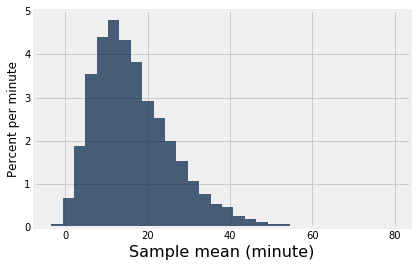

In [50]:

variability(16)

Sample size:           64
Square root n:         8.0
Sample mean SD:        4.95437765638
39.4801998516 / 8.0 = 4.93502498145


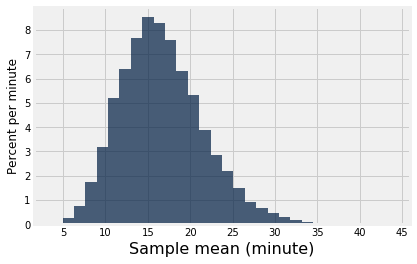

In [51]:
variability(64)

Sample size:           128
Square root n:         11.313708499
Sample mean SD:        3.47476806288
39.4801998516 / 11.313708499 = 3.48958962971


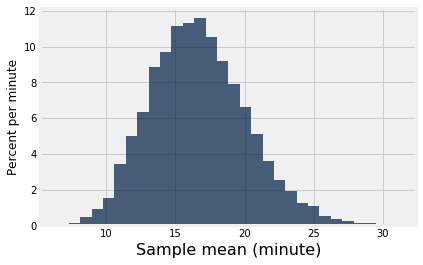

In [52]:
variability(128)

In [54]:
x = 2